In [65]:
from micropro import SCA,ns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import interpolate

In [66]:
path_before = os.path.join(os.getcwd(),'Data','T_before_alto50','T_before_alto50')
before = ns(path_before)
before.fliprows()

WORKING ON:
/home/opdate/Desktop/phdthesis/jupyter notebook/Data/T_before_alto50/T_before_alto50
41.0
Num. rows: 801, Num. Cols: 821
Size expected: 657621, Size retrieved: 658442
WARNING! SIZES DO NOT MATCH!
Difference: -821
Maybe rows: -1.02496878901
Maybe cols: -1.0
 I am trying to fix it passing 1 for rows and 0 for columns
Now I am correcting the x-y range
Freq. from column: 300.365853659 Frq.: 300.0 CCD: 600.0
Retrieved rows: 802  cols: 821


In [67]:
before.mfilter()

No total file found!


' Between 59.899 mm and 77.899 mm SNR > 512 '

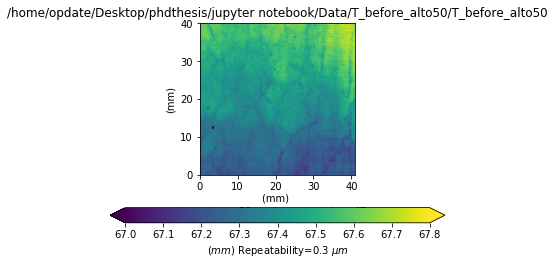

In [68]:
before.plot(vminx=67,vmaxx=67.8)

We subtract a second order fitting.

In [69]:
before.subtractplane(order=2)

X axis inclination  0.011681538939 degrees
Y axis inclination  -0.399459966499 degrees


masked_array(data =
 [[-0.020702757723682907 -0.02868053973195117 -0.01873642358046368 ...,
  -0.0029804589959354644 -0.014579982365034994 -0.02632401382440719]
 [-0.026925991743198097 -0.02016414500687347 -0.026547294642028874 ...,
  0.013175168893667433 0.008991055519160795 -0.018683513211229297]
 [0.029663529006796807 -0.022809604887271462 -0.020472718062990225 ...,
  -0.0024151642675178664 -0.004486296846650362 -0.0206332119300896]
 ..., 
 [0.011302842379194544 0.011169164609256654 0.00971605199126202 ...,
  -0.046540133444040066 -0.04642744954747968 -0.0350380701278965]
 [0.04353725856223889 0.04043538482986264 0.0267443618939609 ...,
  -0.06255978992219013 -0.05240718431228686 -0.05441538317934658]
 [0.019176775706199578 0.04212892280827418 0.03749362969118408 ...,
  -0.05195290989254886 -0.05869977465913223 -0.03170137700814735]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False Fals

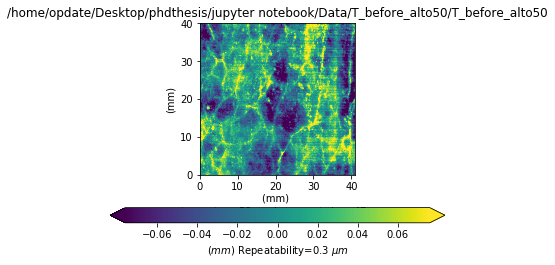

In [70]:
before.plot()

We create a function for formatting the plot.

In [71]:
from matplotlib import ticker
def set_axes(surf,ax,title):
    xticks = ticker.FuncFormatter(
            lambda x, pos: '{0:g}'.format(
                x * surf.parameters.stage_step))
    yticks = xticks


    ax.xaxis.set_major_formatter(xticks)
    ax.yaxis.set_major_formatter(yticks)
    ax.set_xlabel(
        '(mm) stage step=%i $\mu m$ ' %
        (surf.parameters.stage_step * 1000))
    ax.set_ylabel('(mm)')
    ax.set_title(title)

# Analysis using Hierachical Peak-valley analysis
We use the HPVA for assessing the original scan.

In [8]:
sca = SCA.SCA(before)
sca.run()

##PERFORMING ANALYSIS ON MAXIMUMS... 
Trasposing the array...=============================---------] 85.7% ...C: 6 H
Locating full peaks..===============================---------] 85.7% ...C: 6 V
##PERFORMING ANALYSIS ON MINIMUMS... 
Trasposing the array...=====================-----------------] 71.4% ...C: 5 H
Locating full peaks..=======================-----------------] 71.4% ...C: 5 V
##COMBINIG THE RESULTS...


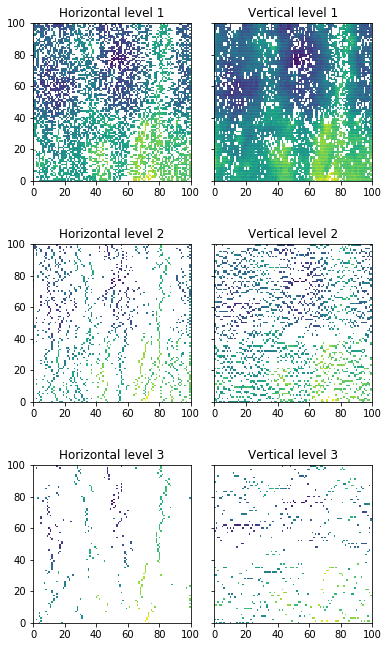

In [9]:
number_of_levels=3
fig  = plt.figure(figsize=(5.5,9.36))
count = 1
sca.smin.h_components
for i in range(number_of_levels):
      ax = fig.add_subplot(number_of_levels*100+20+count)
      g = ax.pcolormesh(sca.h_components[i][-100:,-100:],rasterized=True)
      ax.set_title("Horizontal level %s" %(i+1))
      ax.axes.set_aspect('equal')
      count +=1
      ax2 = fig.add_subplot(number_of_levels*100+20+count)
      g2 = ax2.pcolormesh(sca.v_components[i][-100:,-100:],rasterized=True)
      ax2.set_title("Vertical level %s" %(i+1))
      ax2.set_yticklabels([])
      ax2.axes.set_aspect('equal')
      count +=1


        
plt.tight_layout()


Plotting only the peaks `smax` can help to visualize the problems.

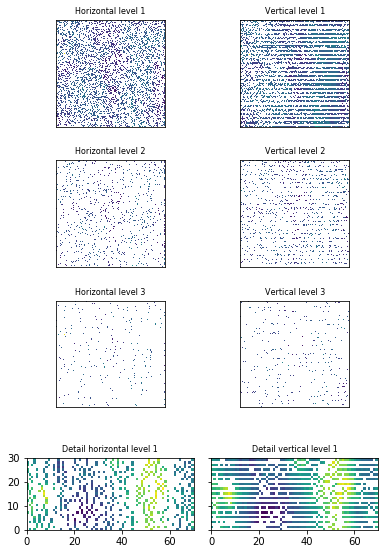

In [10]:
number_of_levels=3
fig  = plt.figure(figsize=(5.5,8))
count = 1
sca.smin.h_components
for i in range(number_of_levels):
      ax = fig.add_subplot(number_of_levels*100+220+count)
      g = ax.pcolormesh(sca.smax.h_components[i],rasterized=True)
      ax.set_title("Horizontal level %s" %(i+1),fontsize=8)
      ax.axes.set_aspect('equal')
      ax.axes.get_xaxis().set_visible(False)
      ax.axes.get_yaxis().set_visible(False)
      ax.set_ylabel("Horizontal level %s" %(i+1))

      count +=1
      ax2 = fig.add_subplot(number_of_levels*100+220+count)
      g2 = ax2.pcolormesh(sca.smax.v_components[i],rasterized=True)
      ax2.set_title("Vertical level %s" %(i+1),fontsize=8)
      ax2.set_ylabel("Vertical level %s" %(i+1),fontsize=8)
      ax2.axes.get_xaxis().set_visible(False)
      ax2.axes.get_yaxis().set_visible(False)
      ax2.axes.set_aspect('equal')
      count +=1

ax = fig.add_subplot(number_of_levels*100+220+count)
g = ax.pcolormesh(sca.smax.h_components[0][-30:,-70:],rasterized=True)
ax.set_title("Detail horizontal level 1",fontsize=8 )
ax.axes.set_aspect('equal')
count +=1
ax2 = fig.add_subplot(number_of_levels*100+220+count)
g2 = ax2.pcolormesh(sca.smax.v_components[0][-30:,-70:],rasterized=True)
ax2.set_title("Detail vertical level 1",fontsize=8)
ax2.set_yticklabels([])
ax2.axes.set_aspect('equal')
count +=1
plt.tight_layout()
fig.subplots_adjust(bottom=-0.2)
plt.savefig('HPVA_titian.pdf',dpi=300)

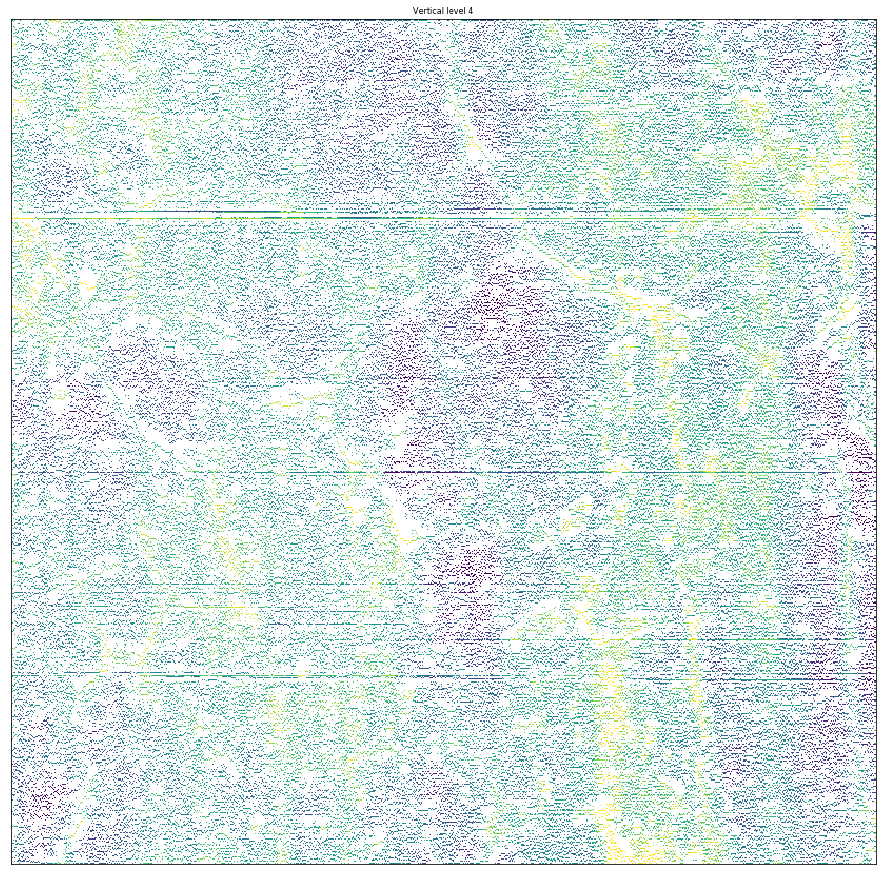

In [11]:
fig2  = plt.figure(figsize=(15.5,18))
ax2 = fig2.add_subplot(111)
i = 3
g = ax2.pcolormesh(sca.v_components[1],rasterized=True,vmin=-0.1, vmax=0.1)
#g = ax2.pcolormesh(sca.smax.full_peaks_component)
ax2.set_title("Vertical level %s" %(i+1),fontsize=8)
ax2.axes.set_aspect('equal')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_ylabel("Vertical level %s" %(i+1))


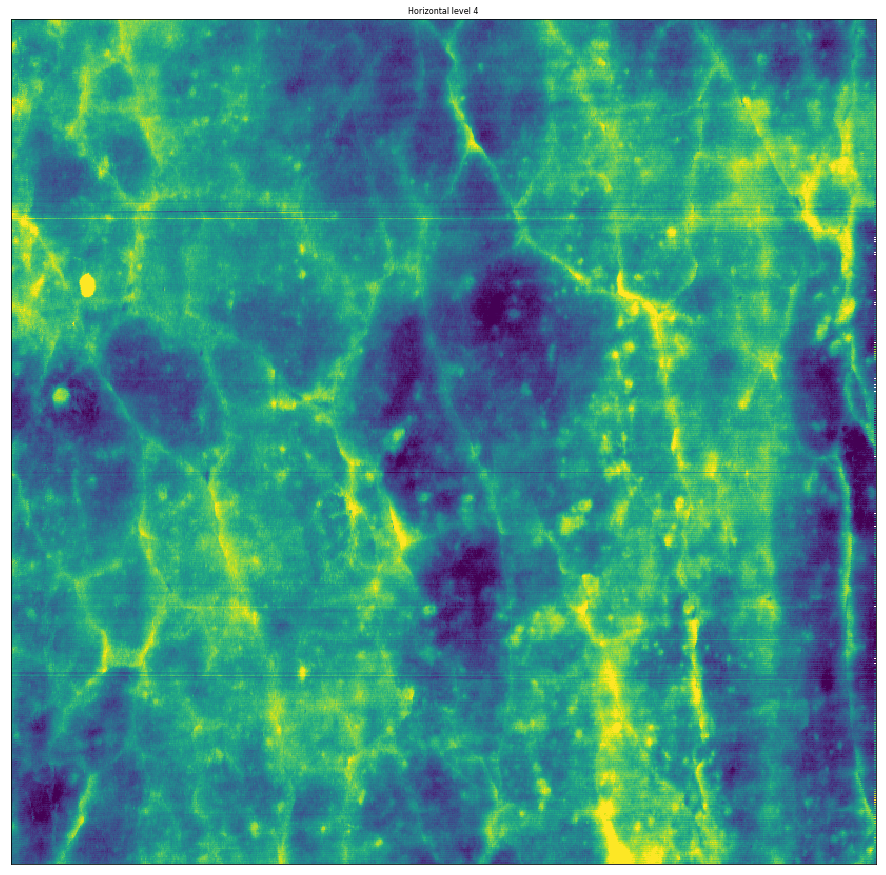

In [12]:
fig2  = plt.figure(figsize=(15.5,18))
ax2 = fig2.add_subplot(111)
i = 3
g = ax2.pcolormesh(before.array,rasterized=True,vmin=-0.1, vmax=0.1)
#g = ax2.pcolormesh(sca.smax.full_peaks_component)
ax2.set_title("Horizontal level %s" %(i+1),fontsize=8)
ax2.axes.set_aspect('equal')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_ylabel("Horizontal level %s" %(i+1))

# Computing the difference between before and after cleaning
For computing the distance between the scan acquired before and after cleaning we will reinizialie the original array without any form subtraction.

In [114]:
before.inizialize()
before.fliprows()
before.mfilter()
path_after = os.path.join('Data','T_after_alto50','T_after_alto50')
after = ns(path_after)
after.fliprows()
after.mfilter()

WORKING ON:
/home/opdate/Desktop/phdthesis/jupyter notebook/Data/T_before_alto50/T_before_alto50
41.0
Num. rows: 801, Num. Cols: 821
Size expected: 657621, Size retrieved: 658442
WARNING! SIZES DO NOT MATCH!
Difference: -821
Maybe rows: -1.02496878901
Maybe cols: -1.0
 I am trying to fix it passing 1 for rows and 0 for columns
Now I am correcting the x-y range
Freq. from column: 300.365853659 Frq.: 300.0 CCD: 600.0
Retrieved rows: 802  cols: 821
No total file found!
WORKING ON:
Data/T_after_alto50/T_after_alto50
41.0
Num. rows: 801, Num. Cols: 821
Size expected: 657621, Size retrieved: 658442
WARNING! SIZES DO NOT MATCH!
Difference: -821
Maybe rows: -1.02496878901
Maybe cols: -1.0
 I am trying to fix it passing 1 for rows and 0 for columns
Now I am correcting the x-y range
Freq. from column: 500.609756098 Frq.: 500.0 CCD: 1000.0
Retrieved rows: 802  cols: 821
No total file found!


' Between 59.899 mm and 77.899 mm SNR > 512 '

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

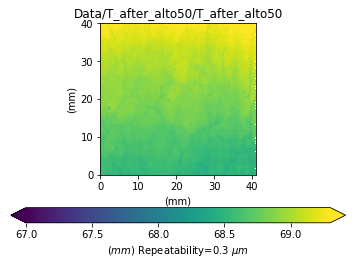

In [115]:
after.plot(vminx=67,vmaxx=69.3,plot=False)

We compute the difference between the two arrays. Subtracting the scan after the cleaning and the scan before the cleaning in this way the results will be negative if some part has been remove or positive is someting has been added.

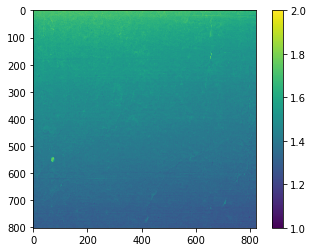

In [116]:
difference = after.array- before.array 
plt.imshow(difference,vmin=1,vmax=2)
plt.colorbar()

In [117]:
difference

masked_array(data =
 [[1.7241439819335938 1.714935302734375 1.7168121337890625 ...,
  1.6532211303710938 1.6498489379882812 1.6483001708984375]
 [1.7251358032226562 1.7288055419921875 1.7096939086914062 ...,
  1.6649017333984375 1.6759567260742188 1.7055587768554688]
 [1.8072357177734375 1.72528076171875 1.7290573120117188 ...,
  1.6499404907226562 1.6546630859375 1.650970458984375]
 ..., 
 [1.30743408203125 1.3119964599609375 1.312835693359375 ...,
  1.2575225830078125 1.25994873046875 1.2681427001953125]
 [1.3125 1.3337860107421875 1.3199996948242188 ..., 1.24969482421875
  1.2601470947265625 1.2620849609375]
 [1.3032302856445312 1.3255081176757812 1.3299026489257812 ...,
  1.2557601928710938 1.2527847290039062 1.2576141357421875]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False

It appears that there is a tilting and an offset between the two acquisition probably due to some movements of the system or of the canvas.

In [118]:
subtracted = after.subtractplane(array=difference)

X axis inclination  -0.0164700995717 degrees
Y axis inclination  -1.11069234996 degrees


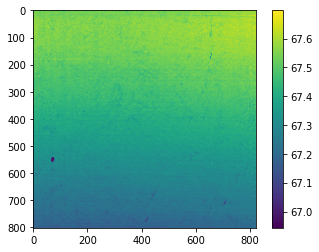

In [119]:
plt.imshow(subtracted)
plt.colorbar()

# Computing the difference over the scan levelled
We try to compute the difference after levelling each scan.

In [120]:
before.subtractplane()
after.subtractplane()

X axis inclination  0.0571292227252 degrees
Y axis inclination  -0.592386586751 degrees
X axis inclination  -0.0164621223626 degrees
Y axis inclination  -1.11069197275 degrees


masked_array(data =
 [[-0.044702865016120086 -0.0434965278033701 -0.035454253090634325 ...,
  -0.1266522403242618 -0.13527256326777604 -0.14586127000033855]
 [-0.0525387031195379 -0.049470793641177124 -0.03676695886983339 ...,
  -0.12250229961908587 -0.13813403613681885 -0.1958037365217251]
 [-0.07866982930889321 -0.04921184414693869 -0.0506757950201262 ...,
  -0.12345642385531619 -0.1306424206269554 -0.14348942814076793]
 ..., 
 [-0.07592325183559012 -0.08035503718143389 -0.08238356324994811 ...,
  -0.018186042671075597 -0.02060366786066936 -0.017512870198714836]
 [-0.049335261814007936 -0.07345851444500795 -0.07309904002524092 ...,
  -0.02666274991511841 -0.027066214948462175 -0.03111653056775765]
 [-0.0650064881010195 -0.06406717969686326 -0.07283246113647124 ...,
  -0.022405997686504975 -0.02628083723156749 -0.0042157353703942135]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False

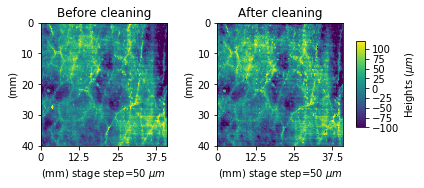

In [121]:
figsb = plt.figure(figsize=(6,3))
axsb = figsb.add_subplot(121)
axsb.imshow(before.array*1000,vmin=-100,vmax=120)
set_axes(before,axsb,'Before cleaning')
axsb2 = figsb.add_subplot(122)
set_axes(after,axsb2,'After cleaning')
cm = axsb2.imshow(after.array*1000,vmin=-100,vmax=120)

# colorbar
figsb.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.4, hspace=0.1)
cb_ax = figsb.add_axes([0.83, 0.3, 0.02, 0.4])
cbar = figsb.colorbar(cm, cax=cb_ax)
cbar.set_label('Heights ($\mu m$)')
#plt.tight_layout()
plt.savefig('Before_after.pdf')

In [122]:
difference = after.array - before.array

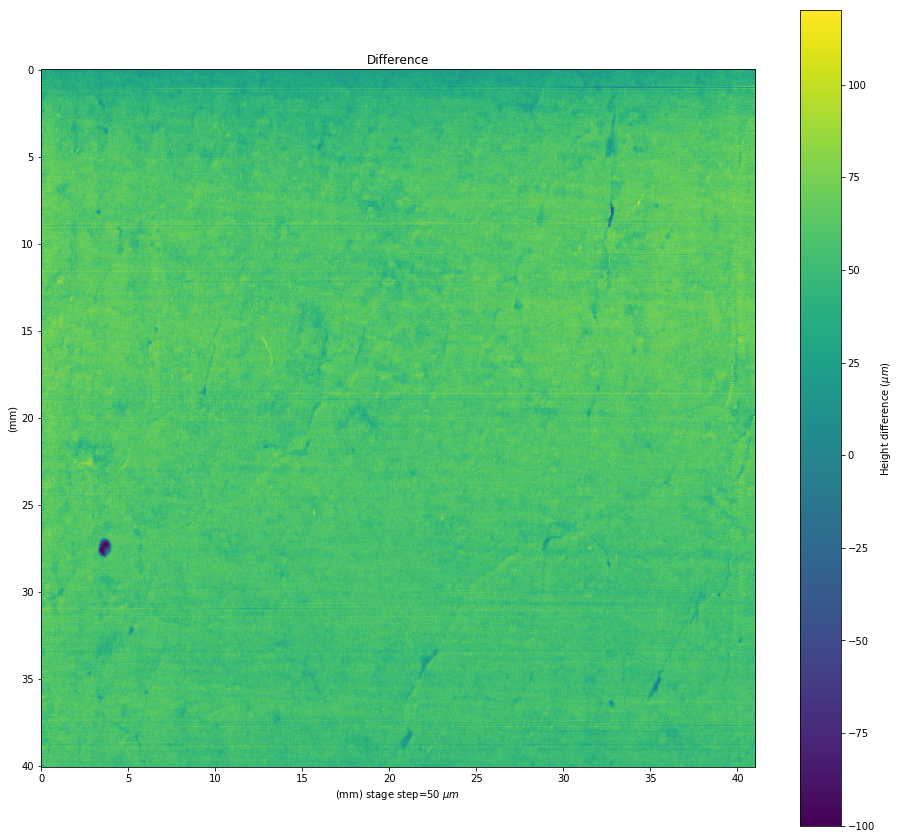

In [123]:
figdd = plt.figure(figsize=(16,15))
axdd = figdd.add_subplot(111)
axdd.imshow(difference*1000)
set_axes(before,axdd,'Difference')
cbar = figdd.colorbar(cm)
cbar.set_label('Height difference ($\mu m$)')
#figdd.savefig('TitDifference_a.pdf')

The avarage difference is defined as the avarage absolute value of the differences.

In [124]:
print("Difference: %.2f µm" %(np.mean(abs(difference))*1000))

Difference: 14.63 µm


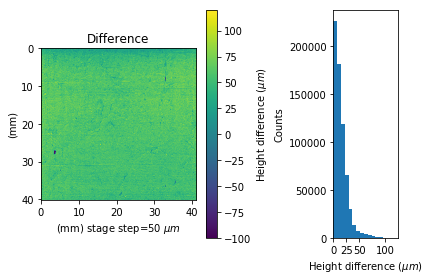

In [106]:
figdd = plt.figure(figsize=(6,3))
figdd, (axdd, axdd2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
axdd.imshow(difference*1000)
set_axes(before,axdd,'Difference')
cbar = figdd.colorbar(cm,ax = axdd)
cbar.set_label('Height difference ($\mu m$)')
#figdd.savefig('TitDifference.pdf')
#axdd2 = figdd.add_subplot(122)
axdd2.hist(abs(difference).flatten()*1000,bins=50)
axdd2.set_xlabel('Height difference ($\mu m$)')
axdd2.set_ylabel('Counts')
axdd2.set_xlim(0,125)
axdd2.set_xticks([0,25,50,100])
plt.tight_layout()
figdd.savefig('TitDifference.pdf')

# Detecting artifacts extracting the scanning pattern

In [38]:
even = before.array[::2]
odd = before.array[1::2]
e = np.mean(even)
o = np.mean(odd)

In [39]:
e

-0.0030845526371385376

In [40]:
o

0.0030845526371125627

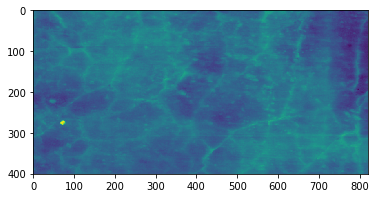

In [41]:
plt.imshow(even)

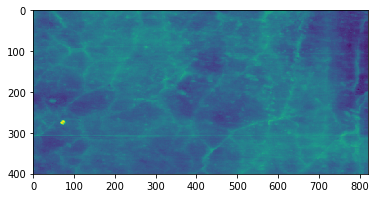

In [42]:
plt.imshow(odd)

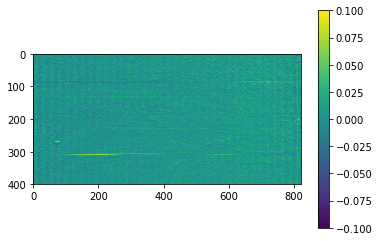

In [43]:
plt.imshow(odd-even,vmin=-0.1,vmax=0.1)
plt.colorbar()

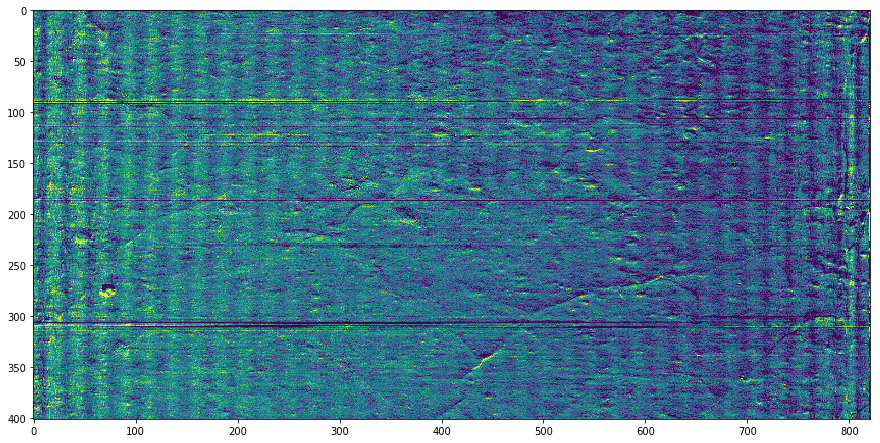

In [55]:
figddc = plt.figure(figsize=(15,15))
axddc = figddc.add_subplot(111)
axddc.imshow(before.array[::2] - before.array[1::2],vmin=-0.02,vmax=0.02)

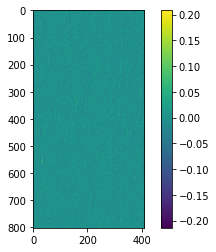

In [45]:
plt.imshow(before.array[:,1::2] - before.array[:,:-1:2])
plt.colorbar()

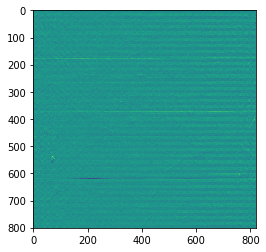

In [46]:
plt.imshow(np.diff(before.array,axis=0))

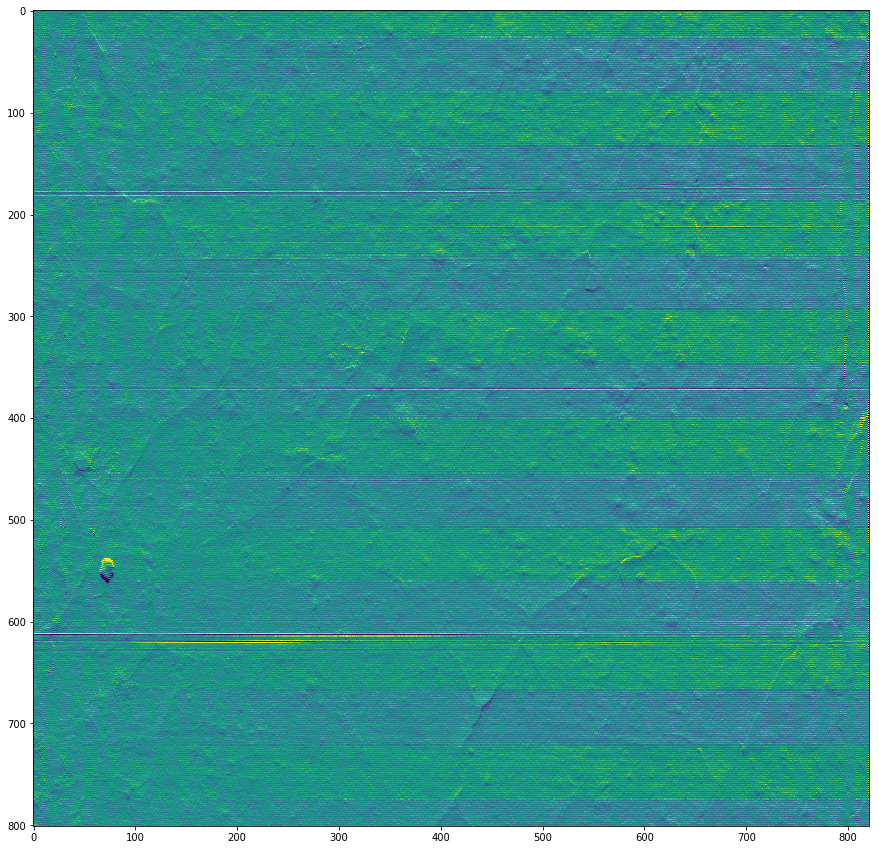

In [49]:
figdd = plt.figure(figsize=(15,15))
axdd = figdd.add_subplot(111)
axdd.imshow(np.diff(before.array,axis=0),vmin=-0.05,vmax=0.05)

# Experiments mixing the levels of the HPVA and reconstructing the matrix

We can select some levels and recompose the original data without some noise. In this case we remove from the first vertical component the masked value of the second horizontal component. This means that only the peaks are kept form a horizontal line all the rest will be masked. In this way we try to remove the horizontal lines.

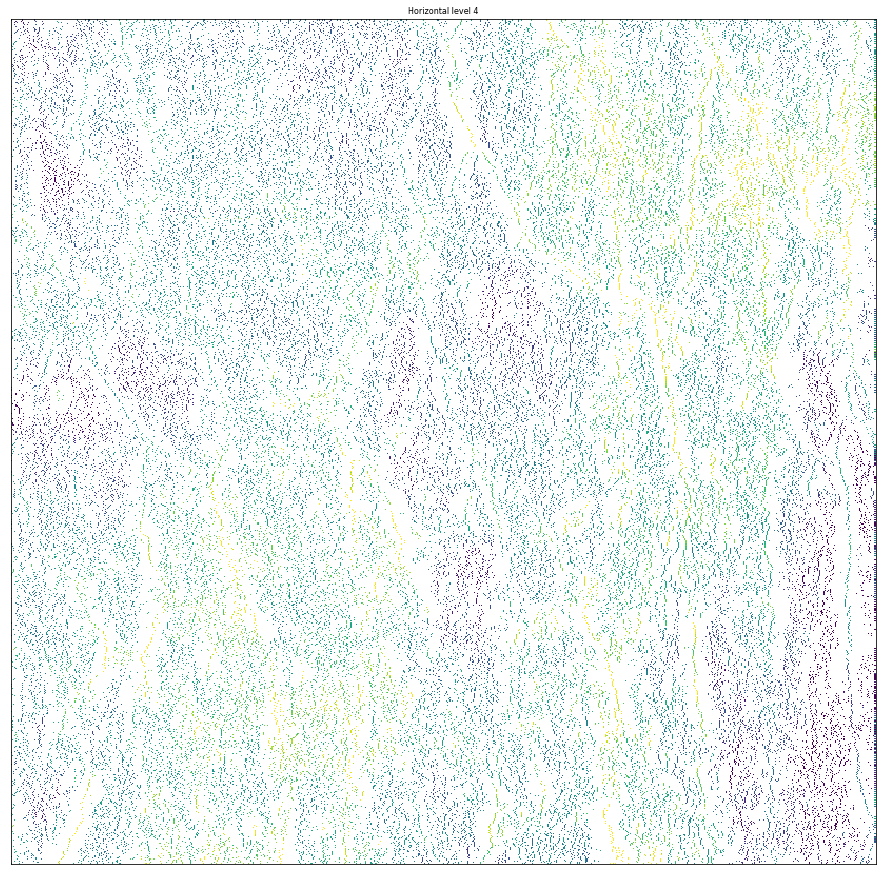

In [34]:
fig2  = plt.figure(figsize=(15.5,18))
ax2 = fig2.add_subplot(111)
i = 3
data = before.array.copy()
data = np.ma.array(data)
# we compute a new mask fusing the mask of different vertical and horizontal levels
newmask = sca.v_components[0].mask+sca.h_components[1].mask
data.mask = newmask
g = ax2.pcolormesh(data,rasterized=True,vmin=-0.1, vmax=0.1)
#g = ax2.pcolormesh(sca.smax.full_peaks_component)
ax2.set_title("Horizontal level %s" %(i+1),fontsize=8)
ax2.axes.set_aspect('equal')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_ylabel("Horizontal level %s" %(i+1))

In [35]:
x = np.arange(0, data.shape[1])
y = np.arange(0, data.shape[0])
#mask invalid values
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~data.mask]
y1 = yy[~data.mask]
newarr = data[~data.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='cubic')
plt.imshow(GD1)

NameError: name 'interpolate' is not defined

In [ ]:
fig3  = plt.figure(figsize=(15.5,18))
ax3 = fig3.add_subplot(111)
i = 3
g = ax3.imshow(GD1,rasterized=True,vmin=-0.1, vmax=0.1)
#g = ax2.pcolormesh(sca.smax.full_peaks_component)
ax3.set_title("Horizontal level %s" %(i+1),fontsize=8)
ax3.axes.set_aspect('equal')
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax3.set_ylabel("Horizontal level %s" %(i+1))

In [ ]:
sca.v_components[1].mask

In [ ]:
data = before.array.copy()
data = np.ma.array(data)
data.mask = ~sca.v_components[1].mask
x = np.arange(0, data.shape[1])
y = np.arange(0, data.shape[0])
#mask invalid values
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~data.mask]
y1 = yy[~data.mask]
newarr = data[~data.mask]

GDX = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='linear')
plt.imshow(GDX)

In [ ]:
plt.imshow(GD1,vmax=0.2)
plt.colorbar()

In [ ]:
data = sca.h_components[1]
x = np.arange(0, data.shape[1])
y = np.arange(0, data.shape[0])
#mask invalid values
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~data.mask]
y1 = yy[~data.mask]
newarr = data[~data.mask]

GD2 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='linear')
plt.imshow(GD2)

In [ ]:
figt = plt.figure()

axt = figt.add_subplot(121)
axt.imshow(before.array[:600,100:],vmax=0.15)#[0:500,0:500])
set_axes(before,axt,'Original scan')
axt2 = figt.add_subplot(122)
axt2.imshow(GD1[:600,100:],vmax=0.15)#[0:500,0:500])
set_axes(before,axt2,'Corrected scan')
plt.tight_layout()
figt.savefig('Corrction_HPV.pdf')

In [ ]:
figt = plt.figure()
axt = figt.add_subplot(121)
axt.imshow(before.array[:600,100:],vmax=0.15)#[0:500,0:500])
axt2 = figt.add_subplot(122)
axt2.imshow(GD1[:600,100:],vmax=0.15)#[0:500,0:500])